In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

In [24]:
data = pd.read_csv('..\\data\\iris.csv')
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [25]:
data.shape

(150, 5)

In [26]:
data['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [27]:
data.dropna(axis=0,inplace=True)
data.replace(['setosa','versicolor','virginica'],[1,2,3],inplace=True)

In [28]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import *
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [39]:
X = data[['sepal_length','sepal_width','petal_length','petal_width']]
y = data[['species']]

In [40]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [41]:
params_grid = {
    'n_neighbors':np.arange(1,20),
    'metric':['euclidean','manhattan']
}
grid = GridSearchCV(KNeighborsClassifier(),params_grid,cv=5)
grid.fit(X_train,y_train)
grid.best_score_

0.975

In [42]:
grid.best_estimator_

KNeighborsClassifier(metric='manhattan', n_neighbors=18)

### Confusion metrics

In [43]:
confusion_matrix(y_test,grid.predict(X_test))
# Avec le resultats on vois les erreurs de classement du modèles

array([[ 8,  0,  0],
       [ 0, 12,  0],
       [ 0,  1,  9]], dtype=int64)

In [44]:
import seaborn as sns

<AxesSubplot:>

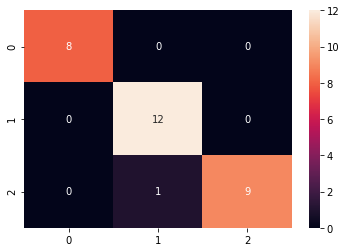

In [46]:
cmtx = confusion_matrix(y_test,grid.predict(X_test))
sns.heatmap(cmtx,annot=True)

In [47]:
accuracy_score(y_test,grid.predict(X_test))
# On remarque que 96% des données de test ont été correctement classer

0.9666666666666667

In [54]:
#Le rappel est le rapport tp / (tp + fn) où tp est le nombre de vrais positifs et fn le nombre de faux négatifs
#recall_score :: la capacité du classificateur à trouver tous les échantillons positifs
recall_score(y_test, grid.predict(X_test), average="weighted")

0.9666666666666667

In [57]:
#Calculez la précision La précision est le rapport tp / (tp + fp) où tp est le nombre de vrais positifs et fp le nombre de faux #positifs. La précision est intuitivement la capacité du classificateur à ne pas étiqueter comme positif un échantillon négatif.
precision_score(y_test, grid.predict(X_test), average="weighted")

0.9692307692307692

In [58]:
#Calculez le score F1, également appelé score F équilibré ou mesure F Le score F1 peut être interprété comme une moyenne pondérée #de la précision et du rappel, où un score F1 atteint sa meilleure valeur à 1 et son pire score à 0. La contribution relative de #la précision et du rappel au score F1 est égale. La formule du score F1 est:F1 = 2 * (precision * recall) / (precision + recall)
f1_score(y_test, grid.predict(X_test), average='micro')

0.9666666666666667